In [138]:
import re
import nltk
import random
import operator
nltk.download('stopwords')
import numpy as np
from collections import OrderedDict
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /home/mayank/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
f = open("Assignment_2_data.txt")
with_stopwords = []
total_output = []
token_counts = OrderedDict()
token_countsDict = dict()
ind_list = None
lines = f.readlines()
random.shuffle(lines) # shuffling for random 80% train data and 20% test data
total_input = []
lamda = 0.1 #learning rate
epoch = 15
x_axis = []
y_axis =[]
test_y_axis =[]

In [140]:
for line in lines:
    line = line.strip()
    tokens = re.findall(r"[\w']+",line)
    if(line[0:3]=='ham'):
        line = line[3:]
        total_output.append(0)
        total_input.append(tokens)
    elif(line[0:4]=='spam'):
        line = line[4:]
        total_output.append(1.0)
        total_input.append(tokens)
    with_stopwords.append(tokens)
    tokens = [stemmer.stem(token) for token in tokens]
    for token in tokens:
        token_counts[token] = token_counts.get(token, 0) + 1
        token_countsDict[token] = token_countsDict.get(token, 0) + 1
no_distinct_tokens = len(token_counts)
ind_list = dict()
count = 0
v = no_distinct_tokens
print(len(ind_list))

for key, value in sorted(token_countsDict.items(), key=operator.itemgetter(1),reverse=True):
    ind_list[key] = count
    count+=1
    if count == 2000:
        break
v = len(ind_list)
print (v)

0
2000


In [141]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [142]:
def toVec(tokens):
    global token_countsDict,ind_list
    v_one = np.zeros(v)
    for token in tokens:
        if (ind_list.get(token,0)!=0):
            v_one[ind_list[token]]=1
    return v_one

In [143]:
def vectorize(total_input):
    for i in range(len(total_input)):
        total_input[i] = toVec(total_input[i])
        total_input[i].shape = (len(total_input[i]),1)

In [144]:
w1 = (np.random.rand(100,v)-0.5)*10
b1 = (np.random.rand(100,1)-0.5)*10
w2 = (np.random.rand(50,100)-0.5)*10
b2 = (np.random.rand(50,1)-0.5)*10
w3 = (np.random.rand(1,50)-0.5)*10
b3 = (np.random.rand(1,1)-0.5)*10

In [145]:
vectorize(total_input)
train_x = total_input[:int(0.8*len(total_input))]
train_y = total_output[:int(0.8*len(total_input))]
test_x = total_input[int(0.8*len(total_input)):]
test_y = total_output[int(0.8*len(total_input)):]

In [146]:
def feedForward(x):
    global w1,b1,w2,b2,w3,b3
    t1 = (w1.dot(x))+b1
    x1 = sigmoid(t1)
    t2 = (w2.dot(x1))+b2
    x2 = sigmoid(t2)
    t3 = (w3.dot(x2))+b3
    x3 = sigmoid(t3)
    
    return t1,x1,t2,x2,t3,x3

In [147]:
def error_func(train_x,train_y):
    global w1,b1,w2,b2,w3,b3
    error = 0.0
    for i in range(len(train_x)):
        t1,x1,t2,x2,t3,x3 = feedForward(train_x[i])
        error = error + (train_y[i]- x3)**2
    return error

In [148]:
def backpropogate(y,t1,x1,t2,x2,t3,x3,v):
    global lamda,w1,b1,w2,b2,w3,b3
    dx3 = x3-y
    dt3 = dx3 * (1 - (np.tanh(t3) ** 2))

    # print("del : ", np.sum(dt3**2))

    #print("b3 :",b3)
    b3 -= (lamda * dt3)
    #print("b3 :",b3)
    dw3 = np.outer(dt3, x2)
    #print("w3 :",w3)
    w3 -= (lamda * dw3)
    #print("w3 :",w3)
    dx2 = np.transpose(w3).dot(dt3)

    dt2 = dx2 * (1 - (np.tanh(t2) ** 2))
    b2 -= (lamda * dt2)
    dw2 = np.outer(dt2, x1)

    w2 -= (lamda * dw2)
    dx1 = np.transpose(w2).dot(dt2)
    
    dt1 = dx1 * (1 - (np.tanh(t1) ** 2))
    b1 -= (lamda * dt1)
    dw1 = np.outer(dt1, v)
    w1 -= (lamda * dw1)

In [149]:
 def accuracy(test_x,test_y):
    global w1,b1,w2,b2,w3,b3
    #print(w1,b1,w2,b2,w3,b3)
    correct = 0
    for i in range(len(test_x)):
        t1,x1,t2,x2,t3,x3 = feedForward(test_x[i])
        #print("~ ", x3)
        if abs(x3-test_y[i]) < 0.5:
            correct +=1
    print("Accuracy : ",correct/len(test_x))

In [150]:
count = 0
for _ in range(epoch):
    for i in range(len(train_x)):   
        t1,x1,t2,x2,t3,x3 = feedForward(train_x[i])
        backpropogate(train_y[i],t1,x1,t2,x2,t3,x3,train_x[i])
        if(i%100 == 0):
            x_axis.append(count)
            count +=1
            temp = error_func(train_x,train_y)
            y_axis.append(temp[0][0])
            temp = error_func(test_x,test_y)
            test_y_axis.append(temp[0][0])
    accuracy(test_x,test_y)


Accuracy :  0.8726457399103139
Accuracy :  0.9246636771300448
Accuracy :  0.9766816143497757
Accuracy :  0.9811659192825112
Accuracy :  0.9739910313901345
Accuracy :  0.9838565022421525
Accuracy :  0.9937219730941704
Accuracy :  0.9928251121076234
Accuracy :  0.9937219730941704
Accuracy :  0.9928251121076234
Accuracy :  0.9937219730941704
Accuracy :  0.9937219730941704
Accuracy :  0.9937219730941704
Accuracy :  0.9937219730941704
Accuracy :  0.9928251121076234


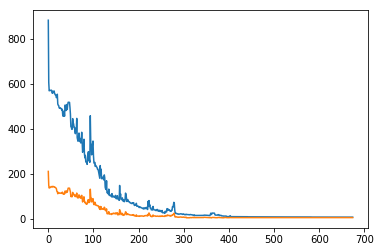

In [151]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis, label = "Train")
plt.plot(x_axis,test_y_axis,label = "Test")